# Tarea 4 - Introducción a la Biomecánica
### Pregunta 1

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from scipy import integrate
from decimal import Decimal
import scipy.optimize as sp

In [2]:
# Paths
harmonic_path = join('data', 'harmonic.csv')
quasistatic_path = join('data', 'quasistatic.csv')

# Data windows
cycle_h = {
    '0': 3935,  # Start of the experiment
    'f': 4136,  # End of the experiment
    '1': 3956   # End of the first oscillation
}
cycle_q = {
    '0': 3870,  # Start of the experiment
    'f': 6571   # End of the experiment
}

# Constants
g = 9.81
A = 7 * 10 ** (-6)
L_0 = 2.2

# Graphs
naranjo = '#F59A23'
azul = '#010589'
rojo = '#E40C2B'
fig_size = (8, 5)

In [3]:
# Import data
harmonic = pd.read_csv(harmonic_path, skiprows=[0, 1, 2, 4])
quasistatic = pd.read_csv(quasistatic_path, skiprows=[0, 1, 2, 4])
quasistatic.head()

,Elapsed Time,Disp,Load 3
0,0.00,1.064,-7.61
1,0.01,1.065,-7.53
2,0.02,1.069,-7.50
3,0.03,1.074,-7.26
4,0.04,1.079,-6.67


In [4]:
# Remove spaces from column names
quasistatic.rename(columns=lambda x: x.strip(), inplace=True)
harmonic.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
# Check data
quasistatic.loc[:, 'Elapsed Time']

0        0.00
1        0.01
2        0.02
3        0.03
4        0.04
        ...  
8536    85.36
8537    85.37
8538    85.38
8539    85.39
8540    85.40
Name: Elapsed Time, Length: 8541, dtype: float64

In [6]:
# Data columns
time_q = quasistatic.loc[:, 'Elapsed Time']
disp_q = quasistatic.loc[:, 'Disp']
load_q = quasistatic.loc[:, 'Load 3']
load_q = load_q - load_q[cycle_q['0']]

str_q = (load_q * g / 1000) / A                     # Stress
def_q = (disp_q - disp_q[cycle_q['0']]) / L_0       # Deformation

time_h = harmonic.loc[:, 'Elapsed Time']
disp_h = harmonic.loc[:, 'Disp']
load_h = harmonic.loc[:, 'Load 3']
load_h = load_h - load_h[cycle_h['0']]

str_h = (load_h * g / 1000) / A                     # Stress
def_h = (disp_h - disp_h[cycle_h['0']]) / L_0       # Deformation

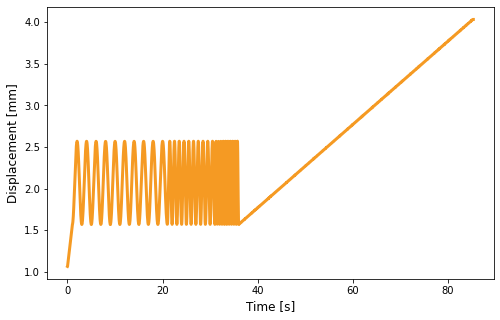

In [7]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_q,
    disp_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

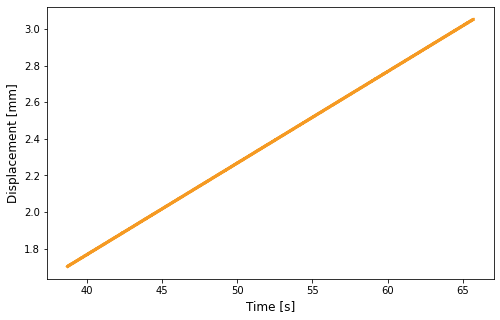

In [8]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_q[cycle_q['0']:cycle_q['f']],
    disp_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

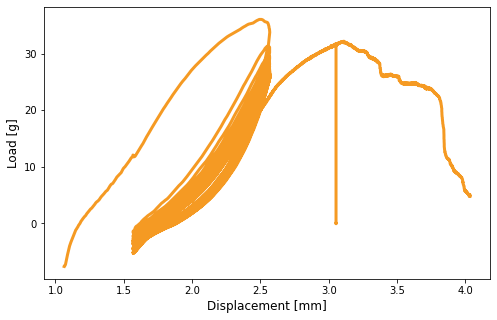

In [9]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_q,
    load_q,
    color=naranjo,
    linewidth=3
)
plt.plot(
    [disp_q[cycle_q['f']] for _ in range(cycle_q['0'], cycle_q['f'])],
    load_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

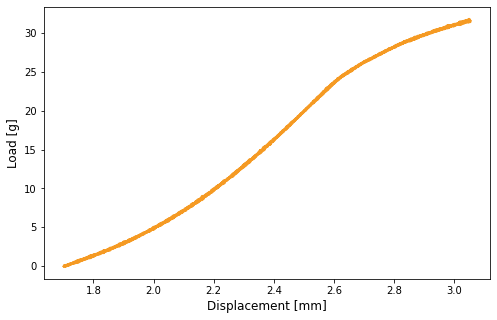

In [10]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_q[cycle_q['0']:cycle_q['f']],
    load_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

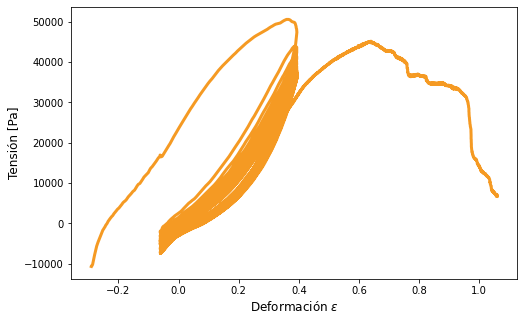

In [11]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_q,
    str_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

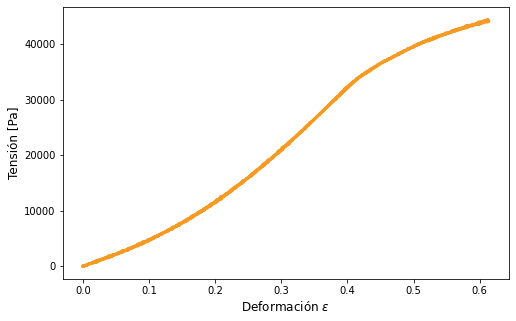

In [12]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_q[cycle_q['0']:cycle_q['f']],
    str_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

#### Caso Armónico

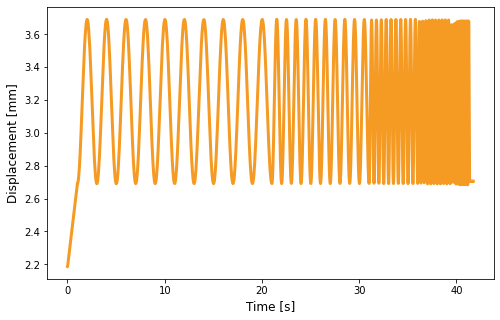

In [13]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h,
    disp_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

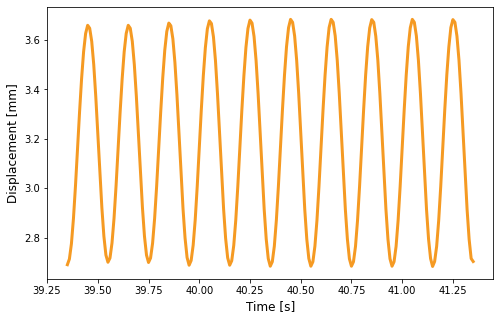

In [14]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h[cycle_h['0']:cycle_h['f']],
    disp_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

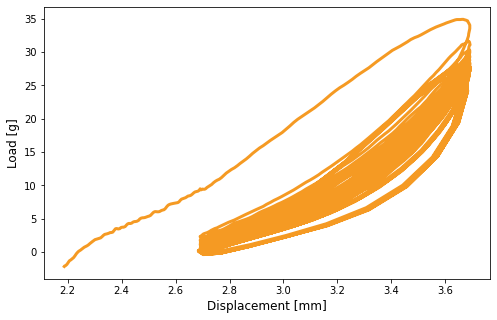

In [15]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_h,
    load_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

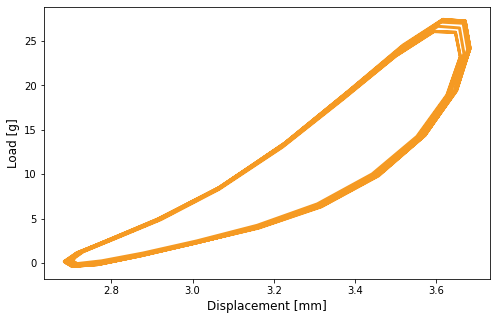

In [16]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_h[cycle_h['0']:cycle_h['f']],
    load_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

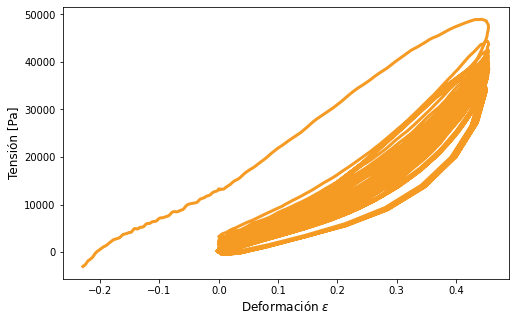

In [17]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h,
    str_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

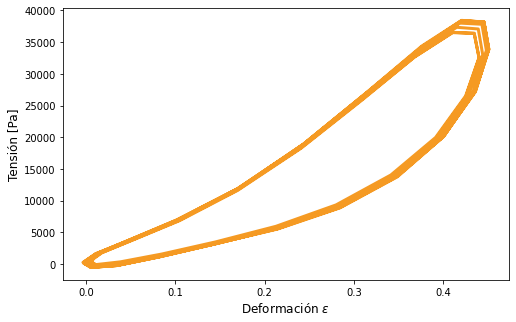

In [18]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h[cycle_h['0']:cycle_h['f']],
    str_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

### Pregunta 2

In [19]:
stretch_q =  def_q + 1  # Stretch

#### Sólido Neohookeano incompresible

In [20]:
def neo_hookean(c, lam):
    return c * (lam ** 2 - 1 / lam)

In [21]:
c_0 = 286

def error_nh(c, x, y):
    return abs(y - neo_hookean(c, x))

In [22]:
nh_c_fit, nh_cov = sp.leastsq(
    func=error_nh,
    x0=c_0,
    args=(
        stretch_q[cycle_q['0']:cycle_q['f']],
        str_q[cycle_q['0']:cycle_q['f']]
    )
)
mu_nh = nh_c_fit
mu_nh

array([23908.84552822])

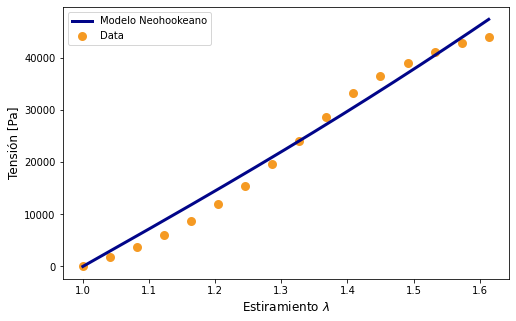

In [23]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:180],
    str_q[cycle_q['0']:cycle_q['f']:180],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    neo_hookean(nh_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Modelo Neohookeano'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

#### Sólido de Voight

In [47]:
global m
m = (def_q[cycle_q['f']] - def_q[cycle_q['0']]) / \
    (time_q[cycle_q['f']] - time_q[cycle_q['0']]) * 10e6
    #(cycle_q['f'] - cycle_q['0'])

In [48]:
print('%.4E' % Decimal(m))

2.2736E+05


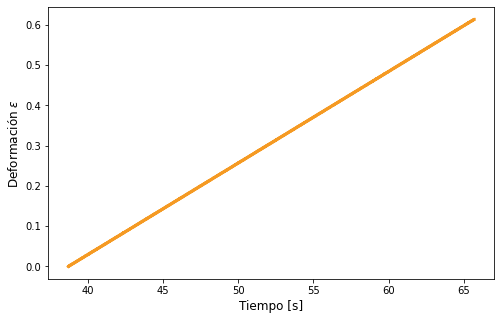

In [41]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_q[cycle_q['0']:cycle_q['f']],
    def_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel(r'Deformación $\epsilon$', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

In [42]:
def voight(c, lam):
    mu, E_v = c
    return mu * m + (lam - 1) * E_v

In [43]:
c_1 = [1, 1]

def error_v(c, x, y):
    return abs(y - voight(c, x))

In [49]:
v_c_fit, v_cov_c = sp.leastsq(
    func=error_v,
    x0=c_1,
    args=(
        stretch_q[cycle_q['0']:cycle_q['f']],
        str_q[cycle_q['0']:cycle_q['f']]
    )
)
mu_v, _ = v_c_fit
mu_v

-0.01381807538518125

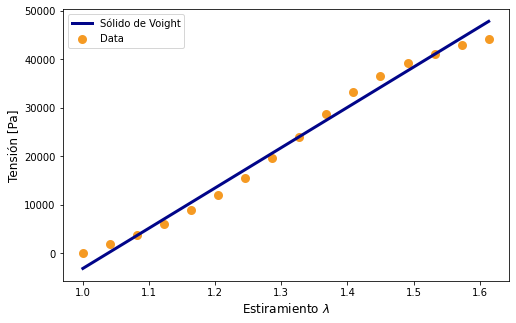

In [50]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:180],
    str_q[cycle_q['0']:cycle_q['f']:180],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    voight(v_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Sólido de Voight'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

#### Sólido lineal estándar

In [31]:
def lineal_standard(c, lam):
    mu, E_1, E_2 = c
    tau_e = mu / E_2
    tau_s = mu * (E_1 + E_2) / (E_1 * E_2)
    return E_1 * ((lam - 1) + m * (tau_e + tau_s))

In [51]:
def lineal_standard(c, lam):
    mu, E_1, E_2 = c
    tau_e = mu / E_2
    tau_s = mu * (E_1 + E_2) / (E_1 * E_2)
    return E_1 * ((lam - 1) + m * (tau_s - tau_e) + np.exp(-(lam - 1) / (tau_e * m)) * m * (tau_e - tau_s))

In [52]:
c_2 = [1, 1, 1]

def error_sls(c, x, y):
    return abs(y - lineal_standard(c, x))

In [53]:
sls_c_fit, sls_cov_c = sp.leastsq(
    func=error_sls,
    x0=c_2,
    args=(
        stretch_q[cycle_q['0']:cycle_q['f']],
        str_q[cycle_q['0']:cycle_q['f']],
    )
)
mu_sls, E_1, E_2 = sls_c_fit
tau_e = mu_sls / E_2
tau_s = mu_sls * (E_1 + E_2) / (E_1 * E_2)
print(mu_sls, tau_e, tau_s)

234169.89859019482 3.1988619761656323 113.20879140930276


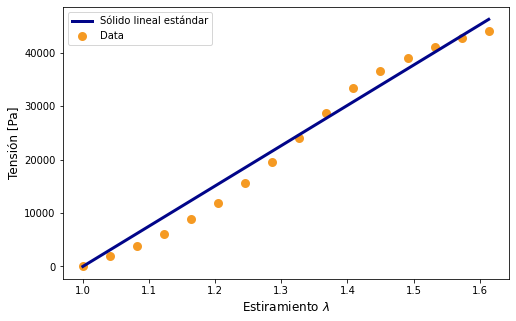

In [54]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:180],
    str_q[cycle_q['0']:cycle_q['f']:180],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    lineal_standard(sls_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Sólido lineal estándar'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

2.0 1.0 1.0000265647992472


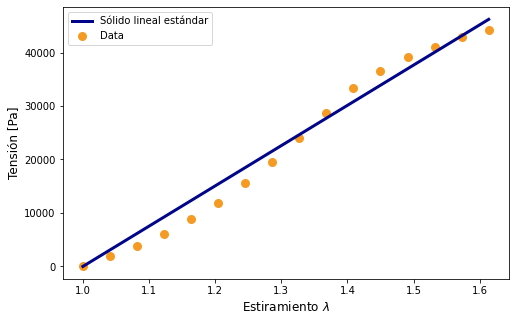

In [38]:
'''
def lineal_standard(c, t):
    mu, E_1, E_2 = c
    tau_e = mu / E_2
    tau_s = mu * (E_1 + E_2) / (E_1 * E_2)
    lambda_2 = stretch_q[round(t * 100)]
    return (lambda_2 - 1) * E_1 * (1 - (1 - tau_s / tau_e) * np.exp(-t / tau_e))

c_2 = [2, 2, 2]

def error_sls(c, x, y):
    return abs(y - lineal_standard(c, x))

sls_c_fit, sls_cov_c = sp.leastsq(
    func=error_sls,
    x0=c_2,
    args=(
        time_q[cycle_q['0']:cycle_q['f']],
        str_q[cycle_q['0']:cycle_q['f']],
    )
)
mu_sls, E_1, E_2 = sls_c_fit
tau_e = mu_sls / E_2
tau_s = mu_sls * (E_1 + E_2) / (E_1 * E_2)
print(mu_sls, tau_e, tau_s)

fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:180],
    str_q[cycle_q['0']:cycle_q['f']:180],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    lineal_standard(sls_c_fit, time_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Sólido lineal estándar'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()
'''

#### Comparación de modelos

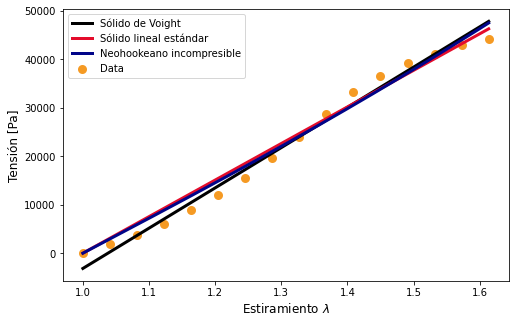

In [55]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    stretch_q[cycle_q['0']:cycle_q['f']:180],
    str_q[cycle_q['0']:cycle_q['f']:180],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    voight(v_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color='black',
    linewidth=3,
    label='Sólido de Voight'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    lineal_standard(sls_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=rojo,
    linewidth=3,
    label='Sólido lineal estándar'
)
plt.plot(
    stretch_q[cycle_q['0']:cycle_q['f']],
    neo_hookean(nh_c_fit, stretch_q[cycle_q['0']:cycle_q['f']]),
    color=azul,
    linewidth=3,
    label='Neohookeano incompresible'
)
plt.legend()
plt.xlabel(r'Estiramiento $\lambda$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

### Pregunta 3

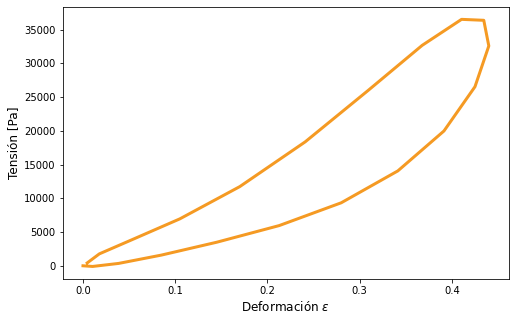

In [56]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h[cycle_h['0']:cycle_h['1']],
    str_h[cycle_h['0']:cycle_h['1']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

In [ ]:
# Integrate using Simpson's rule
# https://en.wikipedia.org/wiki/Simpson%27s_rule
# https://stackoverflow.com/questions/17602076/how-do-i-integrate-two-1-d-data-arrays-in-python

e_loss = integrate.simpson(
      str_h[cycle_h['0']:cycle_h['1']],
      def_h[cycle_h['0']:cycle_h['1']],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss / 1000), 'J')

Energía disipada: -4.1305E+00 J


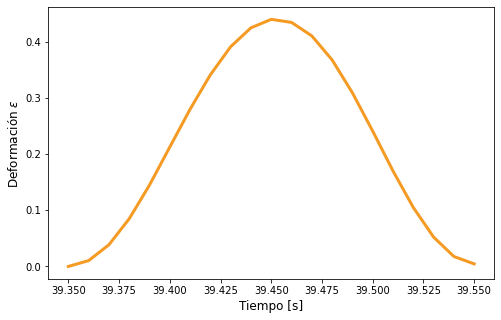

In [ ]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h[cycle_h['0']:cycle_h['1']],
    def_h[cycle_h['0']:cycle_h['1']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel(r'Deformación $\epsilon$', fontsize=12)
plt.show()

In [58]:
global sigma_0, epsilon_0, omega

sigma_0 = max(str_h[cycle_h['0']:cycle_h['f']]) / 2
epsilon_0 = max(def_h[cycle_h['0']:cycle_h['1']]) / 2
omega = 10 * np.pi
omega

31.41592653589793

In [59]:
epsilon_0 ** 2 * np.pi * mu_v * omega

-0.06600740581590597

In [60]:
epsilon_0 ** 2 * np.pi * E_1 * omega * (tau_s - tau_e) / (1 + omega ** 2 * tau_e ** 2)

110.74966618502864

### Bonus

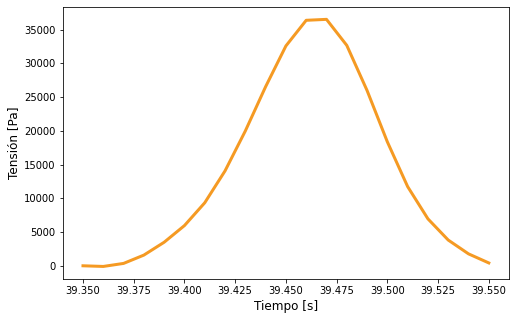

In [ ]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h[cycle_h['0']:cycle_h['1']],
    str_h[cycle_h['0']:cycle_h['1']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

In [ ]:
def harmonic_model(c, t):
    delta = c
    return sigma_0 * (1 + np.cos(omega * t + delta))

In [ ]:
c_h = 1

def error_h(c, x, y):
    return abs(y - harmonic_model(c, x))

In [ ]:
h_c_fit, h_cov = sp.leastsq(
    func=error_h,
    x0=c_h,
    args=(
        time_h[cycle_h['0']:cycle_h['f']],
        str_h[cycle_h['0']:cycle_h['f']]
    )
)
delta_h = h_c_fit

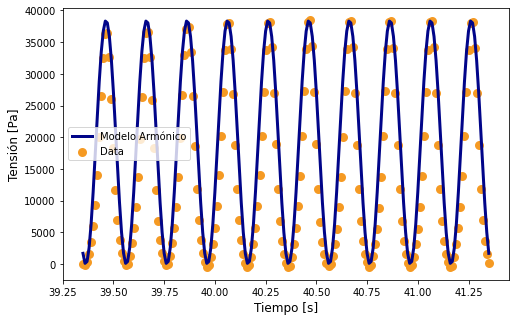

In [ ]:
fig = plt.figure(figsize=fig_size)
plt.scatter(
    time_h[cycle_h['0']:cycle_h['f']],
    str_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3,
    label='Data'
)
plt.plot(
    time_h[cycle_h['0']:cycle_h['f']],
    harmonic_model(h_c_fit, time_h[cycle_h['0']:cycle_h['f']]),
    color=azul,
    linewidth=3,
    label='Modelo Armónico'
)
plt.legend()
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

In [ ]:
sigma_0 / epsilon_0 * np.exp(delta_h)

array([11901.94450781])

#### Hecho con :heart: por Iván Vergara Lam